# Chapter 9 In-chapter examples

In [2]:
# import libraries and define global settings
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

# define global figure properties used for publication
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'savefig.dpi':300,          # output resolution
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 9.1: Sampling variability in random data

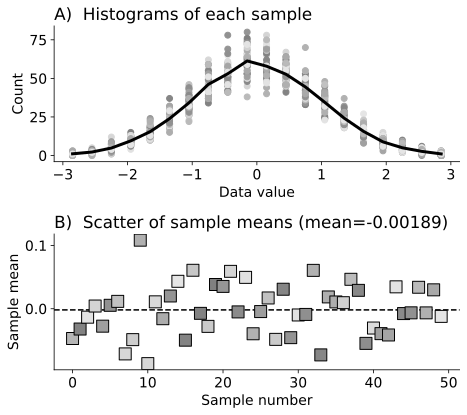

In [3]:
N = 500
nSamples = 50
kHistBins = 20

# bins for histograms
edges = np.linspace(-3,3,kHistBins+1)

# declare matrices
allHistY = np.zeros((nSamples,kHistBins))
allMeans = np.zeros(nSamples)


# setup figure
f,axs = plt.subplots(2,1,figsize=(7,6))

for sampi in range(nSamples):

  # create data (parameters don't chage!)
  data = np.random.normal(loc=0,scale=1,size=N)

  # histograms
  y,x = np.histogram(data,bins=edges)
  allHistY[sampi,:] = y

  # get means
  allMeans[sampi] = np.mean(data)

  # plot
  c = np.random.uniform(low=.5,high=.9)
  axs[0].plot((x[:-1]+x[1:])/2,y,'o',color=(c,c,c))

  axs[1].plot(sampi,np.mean(data),'ks',markersize=12,markerfacecolor=(c,c,c))


# plot the average histogram
axs[0].plot((x[:-1]+x[1:])/2,np.mean(allHistY,axis=0),'k',linewidth=3)

# plot the means, and the mean of the means
axs[1].axhline(np.mean(allMeans),linestyle='--',color='k',zorder=-1)

# make the plots look nicer
axs[0].set(xlabel='Data value',ylabel='Count')
axs[0].set_title(r'A)  Histograms of each sample')
axs[1].set(xlabel='Sample number',ylabel='Sample mean')
axs[1].set_title(r'B)  Scatter of sample means (mean=%.3g)' %np.mean(allMeans))

plt.tight_layout()
plt.show()

### Fig 9.2: Samples and variability of sample means

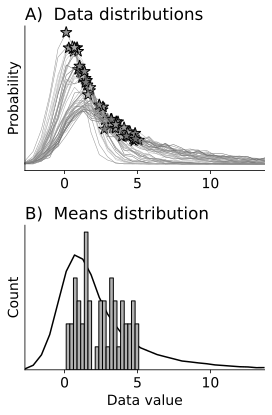

In [5]:
# number of samples
nSamples = 50

# histogram resolution
k = 30
edges = np.linspace(-3,14,31)
xx = (edges[:-1]+edges[1:])/2

# initialize output matrices
meenz  = np.zeros(nSamples) # sample averages
allYYs = np.zeros(k)        # average of histograms



_,axs = plt.subplots(2,1,figsize=(4,6))

# loop over samples
for i in range(nSamples):

  # generate random data from an exGaussian distribution
  randomX = stats.exponnorm.rvs(np.random.uniform(low=.1,high=5),size=2000)

  # get its histogram and normalize
  yy,_ = np.histogram(randomX,bins=edges)
  yy = yy/np.sum(yy)

  # average the distributions
  allYYs += yy

  # store the average of the distribution
  meenz[i] = np.mean(randomX)

  # plot the line
  rc = np.random.uniform(low=.4,high=.8) # random color
  axs[0].plot(xx,yy,linewidth=.5,color=(rc,rc,rc))
  axs[0].plot(meenz[i],yy[np.argmin(np.abs(xx-meenz[i]))],'k*',linewidth=.2,
              markerfacecolor=(rc,rc,rc),markersize=12)


# some plotting adjustments
axs[0].set(xlim=xx[[0,-1]],ylabel='Probability',yticks=[])
axs[0].set_title(r'A)  Data distributions')


## the distribution of sample means
axs[1].hist(meenz,20,facecolor=(.7,.7,.7),edgecolor='k')
axs[1].plot(xx,allYYs/np.max(allYYs)*5,'k',zorder=-10)
axs[1].set(xlim=xx[[0,-1]],xlabel='Data value',ylabel='Count',yticks=[])
axs[1].set_title(r'B)  Means distribution')

# show the figure
plt.tight_layout()
plt.show()

### Fig 9.3: Law of Large Numbers (demo 1)

Expected value (population mean): 2.5
Population size: 4194304


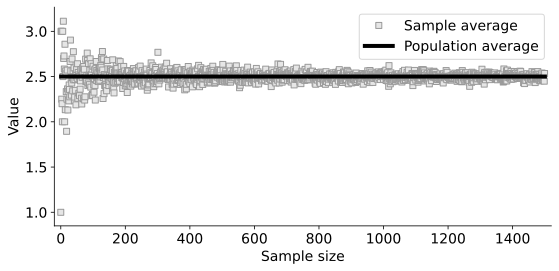

In [6]:
# generate "population"
population = [ 1, 2, 3, 4 ]
for i in range(20):
    population = np.hstack((population,population))

nPop = len(population)
expval = np.mean(population)
print(f'Expected value (population mean): {expval}')
print(f'Population size: {nPop}')
     

## experiment: draw larger and larger samples

k = 1500  # maximum number of samples
sampleAves = np.zeros(k)

for i in range(k):
  # get a sample
  sample = np.random.choice(population,size=i+1)

  # compute and store its mean
  sampleAves[i] = np.mean( sample )


# visualize!
plt.figure(figsize=(8,4))
plt.plot(sampleAves,'s',markerfacecolor=(.9,.9,.9),color=(.6,.6,.6))
plt.plot([1,k],[expval,expval],'k',linewidth=4)
plt.xlabel('Sample size')
plt.ylabel('Value')
plt.xlim([-20,k+20])
plt.ylim([np.min(sampleAves)*.85,1.05*np.max(sampleAves)])
plt.legend(('Sample average','Population average'))

plt.tight_layout()
plt.show()
     


### Fig 9.4: Law of Large Numbers (demo 2)

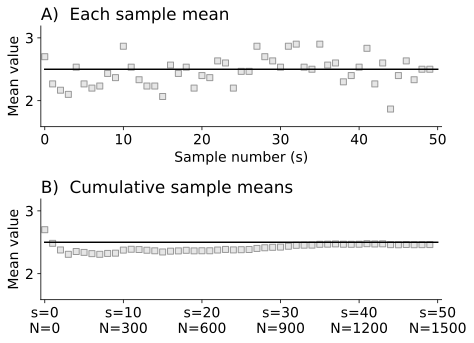

In [7]:
# parameters and initializations
samplesize   = 30
numberOfExps = 50
samplemeans  = np.zeros(numberOfExps)

# run the experiment!
for expi in range(numberOfExps):
  # compute and store its mean
  samplemeans[expi] = np.mean( np.random.choice(population,size=samplesize) )


# show the results
fig,ax = plt.subplots(2,1,figsize=(7,5))

# each individual sample mean
ax[0].plot(samplemeans,'s',markerfacecolor=(.9,.9,.9),color=(.6,.6,.6))
ax[0].set_title(r'A)  Each sample mean')
ax[0].set_xlabel('Sample number (s)')

# cumulative average over the samples
ax[1].plot(np.cumsum(samplemeans) / np.arange(1,numberOfExps+1),
           's',markerfacecolor=(.9,.9,.9),color=(.6,.6,.6))
ax[1].set_title(r'B)  Cumulative sample means')

# multiline xtick labels
xticks = np.arange(0,51,10)
ax[1].set_xticks(xticks,labels=[f's={i}\nN={i*samplesize}' for i in xticks])


# common axis modifications
for a in ax:
  a.plot([0,numberOfExps],[np.mean(population),np.mean(population)],'k')
  a.set(ylabel='Mean value',xlim=[-.5,numberOfExps+.5],
        ylim=[np.min(samplemeans)*.85,1.1*np.max(samplemeans)])

totSS = np.arange(1,numberOfExps+1)*samplesize


plt.tight_layout()
plt.show()

### Fig 9.5: Visualization of sample mean variability

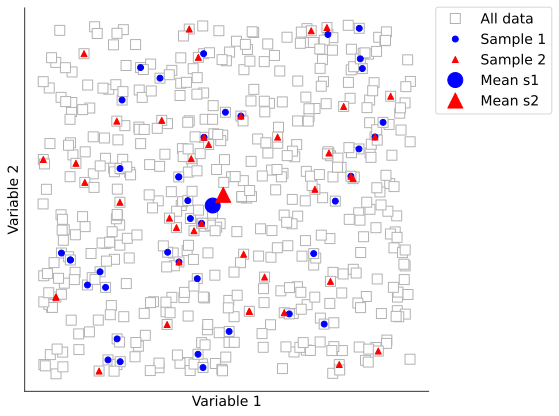

In [8]:
N = 512
X = np.random.rand(N,2)


sample1 = X[np.random.choice(N,size=40),:]
sample2 = X[np.random.choice(N,size=40),:]

plt.figure(figsize=(8,6))

# plot all data points
plt.plot(X[:,0],X[:,1],'s',color=(.7,.7,.7),markerfacecolor='w',markersize=10)

# plot sample data
plt.plot(sample1[:,0],sample1[:,1],'bo')
plt.plot(sample2[:,0],sample2[:,1],'r^')

# plot sample means
plt.plot(np.mean(sample1[:,0]),np.mean(sample1[:,1]),'bo',markersize=15)
plt.plot(np.mean(sample2[:,0]),np.mean(sample2[:,1]),'r^',markersize=15)

plt.xticks([])
plt.yticks([])
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend(['All data','Sample 1','Sample 2','Mean s1','Mean s2'],
           bbox_to_anchor=[1,1.02])

plt.tight_layout()
plt.show()